1. Introduction Objective & Context

This notebook performs a comparative financial analysis of three major French banks:

BNP Paribas

Crédit Agricole

Société Générale

Objective:
Understand their financial trajectories over recent years by comparing:

Revenue

Net income

Balance sheet structure (assets / liabilities / equity)

Leverage ratio

The goal is not audit-level precision, but data-driven financial storytelling using public figures through the Yahoo Finance API.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

2. Methodology & Data Sources

Data Source: Yahoo Finance via yfinance.

Steps followed:

Scrape annual financial reports (income statement + balance sheet)

Consolidate into a structured dataframe

Visualize trends

Interpret key movements

Extract business insights

Note: Public datasets may contain missing values and bank-specific accounting formats.
Interpretations therefore focus on macro-patterns rather than point-accuracy.

## Data Retrieval

In [2]:
tickers = {
    "BNP Paribas": "BNP.PA",
    "Société Générale": "GLE.PA",
    "Crédit Agricole": "ACA.PA",
}
banks = {name: yf.Ticker(symbol) for name, symbol in tickers.items()}
financial_data = []
for name, bank in banks.items():
    income = bank.financials.transpose()
    balance = bank.balance_sheet.transpose()
    for date in income.index:
        row = {
            "Bank": name,
            "Year": date.year,
            "Revenue": income.loc[date].get("Total Revenue", None),
            "Net Income": income.loc[date].get("Net Income", None),
            "Total Assets": balance.loc[date].get("Total Assets", None),
            "Liabilities": balance.loc[date].get("Total Liabilities Net Minority Interest", None),
            "Equity": balance.loc[date].get("Stockholders Equity", None),
        }
        financial_data.append(row)
df = pd.DataFrame(financial_data)
df

,Bank,Year,Revenue,Net Income,Total Assets,Liabilities,Equity
0,BNP Paribas,2024,6.587000e+10,1.168800e+10,2.704908e+12,2.570767e+12,1.281370e+11
1,BNP Paribas,2023,5.973500e+10,1.097500e+10,2.591499e+12,2.462632e+12,1.237420e+11
2,BNP Paribas,2022,5.747700e+10,9.848000e+09,2.663748e+12,2.537738e+12,1.212370e+11
3,BNP Paribas,2021,5.635500e+10,9.488000e+09,2.634444e+12,2.511937e+12,1.178860e+11
4,BNP Paribas,2020,NaN,NaN,NaN,NaN,NaN
5,Société Générale,2024,5.250900e+10,4.200000e+09,1.573545e+12,1.493957e+12,7.025600e+10
6,Société Générale,2023,4.435900e+10,2.493000e+09,1.554045e+12,1.477798e+12,6.597500e+10
7,Société Générale,2022,3.609600e+10,1.825000e+09,1.484900e+12,1.411574e+12,6.697000e+10
8,Société Générale,2021,3.624800e+10,5.641000e+09,1.463573e+12,1.392664e+12,6.509800e+10
9,Société Générale,2020,NaN,NaN,NaN,NaN,NaN


3. Data Overview

After extraction and consolidation, the resulting dataset contains:

Bank name

Year

Revenue

Net income

Total assets

Liabilities

Equity

This dataset forms the basis for trend visualization and interpretation.

## Net Income Evolution

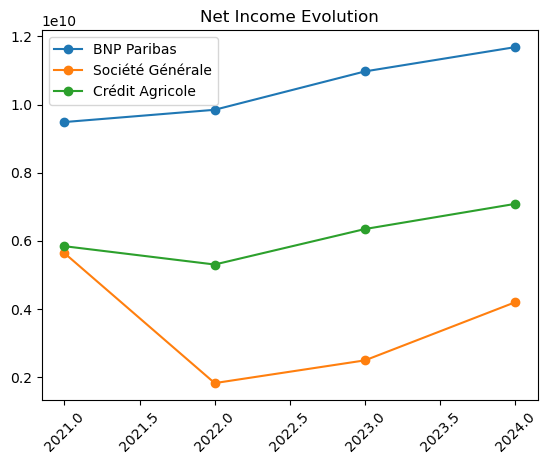

In [3]:
for bank in df['Bank'].unique():
    sub=df[df['Bank']==bank]
    plt.plot(sub['Year'], sub['Net Income'], marker='o', label=bank)
plt.legend(); plt.xticks(rotation=45); plt.title('Net Income Evolution'); plt.show()

4. Net Income Evolution Interpretation
Observations

BNP Paribas reports the highest and most stable profitability, signalling:

strong revenue diversification

ability to absorb shocks

Crédit Agricole shows a steady upward trend consistent with its
retail/mutual banking model stable but not explosive.

Société Générale displays volatility, especially:

a sharp drop in 2022 linked to its exit from Russia

recovery after restructuring

Analyst Insight

Net Income reflects:

operational efficiency

risk absorption capability

exposure to external shocks

BNP performs strongly on all three, while CA trades stability for lower growth, and SG exhibits cyclic resilience but fragility to geopolitical impacts.

## Total Assets Evolution

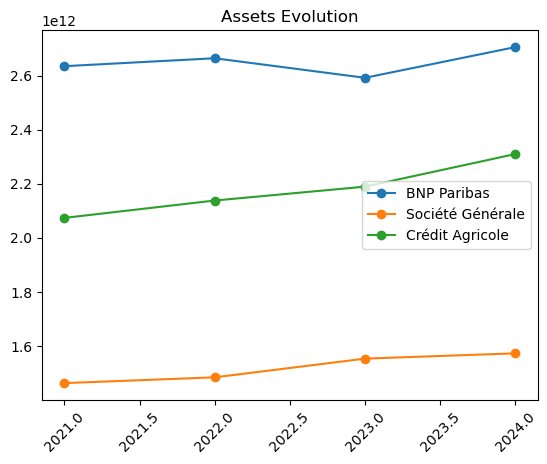

In [4]:
for bank in df['Bank'].unique():
    sub=df[df['Bank']==bank]
    plt.plot(sub['Year'], sub['Total Assets'], marker='o', label=bank)
plt.legend(); plt.xticks(rotation=45); plt.title('Assets Evolution'); plt.show()

5. Total Assets Interpretation
Observations

BNP Paribas remains structurally the largest in size, signalling scale and diversification.

Crédit Agricole expands progressively and conservatively.

Société Générale shows asset compression around 2022-23 a sign of restructuring or risk reduction.

Analyst Insight

Size alone does not equal performance.

The meaningful measure is how effectively assets generate profit.

BNP’s large asset base + high net income = efficient capital deployment

CA scales gradually with steady returns

SG’s contraction signals portfolio risk management rather than expansion

## Leverage Ratio Analysis

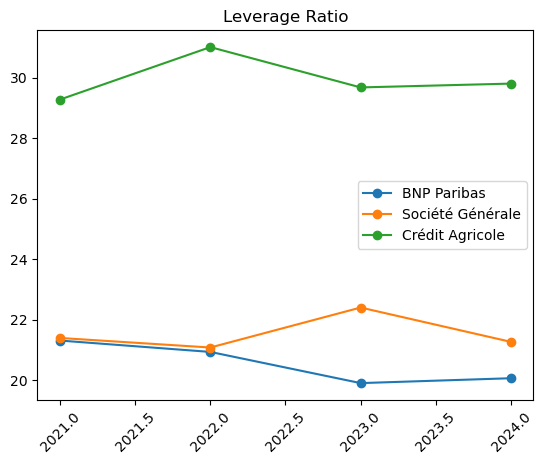

In [5]:
df['Leverage Ratio']=df['Liabilities']/df['Equity']
for bank in df['Bank'].unique():
    sub=df[df['Bank']==bank]
    plt.plot(sub['Year'], sub['Leverage Ratio'], marker='o', label=bank)
plt.legend(); plt.xticks(rotation=45); plt.title('Leverage Ratio'); plt.show()

6. Liabilities vs Equity Capital Structure Analysis

The comparison between liabilities and equity sheds light on how each bank finances its growth and manages risk over time.
This balance is central to understanding a bank’s resilience, strategic positioning, and tolerance to external shocks.

BNP Paribas displays a capital structure supported by a strong and proportionate equity base alongside its liabilities.
This indicates a well-capitalized institution capable of absorbing losses while sustaining large-scale operations. The
relative stability of its equity suggests a conservative and disciplined approach to growth, aligned with its profile as
a diversified and systemically important banking group.

Crédit Agricole, on the other hand, maintains a stable equity base but operates with a higher level of leverage. This
structure reflects a retail-oriented and mutualistic model, where growth is largely financed through traditional 
intermediation activities. While this approach enhances efficiency and return generation, it also implies a greater
reliance on debt funding, making the bank more sensitive to prolonged stress scenarios.

Société Générale shows more pronounced fluctuations in both liabilities and equity, particularly following external shocks.
These variations are consistent with a period of restructuring and risk reallocation. The bank appears more exposed to economic
and geopolitical cycles, yet its ability to stabilize equity after disruptions highlights a degree of adaptability and corrective
management.

Overall, the capital structure of each institution mirrors its underlying business model:

BNP Paribas emerges as resilient and well-capitalized, prioritizing loss absorption and long-term stability.

Crédit Agricole follows a stable but more debt-powered strategy, characteristic of retail-focused banking.

Société Générale remains more sensitive to shocks, reflecting higher exposure to market cycles, but also demonstrates capacity
for adjustment.

This comparison reinforces the idea that capital structure is not merely a balance sheet metric, but a strategic signal of how
banks position themselves between growth, risk, and resilience.

7. Leverage Ratio Interpretation

The leverage ratio answers:

“How aggressively does a bank use debt to finance operations?”

Results:

BNP Paribas : lowest leverage

stronger capital base

lower structural fragility

Crédit Agricole : highest leverage

classic retail/mutualist intermediation

efficient balance sheet usage but more sensitive in downturns

Société Générale : fluctuating

restructuring impact

market risk exposure

Regulatory Insight

Across 2021–2024, leverage remains contained, aligning with Basel III regulation supporting systemic stability.

8. Summary Table & Final Insights

A synthesized comparison:

Bank	Size	Profitability	Leverage	Strategic Profile
BNP Paribas	Largest	Strongest & stable	Lowest	Scale + resilience
Crédit Agricole	Medium-large	Moderate but consistent	Highest	Retail-focused expansion
Société Générale	Smallest	Volatile	Variable	Cycle-sensitive but adaptive
Key Takeaways

BNP demonstrates robust, diversified performance

Crédit Agricole delivers prudent but leveraged growth

Société Générale appears reactive and externally sensitive

These differences reflect how business models shape financial outcomes, even in a regulated industry.

9. What I Learned

This project strengthened:

* Financial vocabulary (assets, equity, leverage, net income…)
* Ability to extract insights from real-world data
* Skill in structuring a comparative study
* Understanding of risk drivers in banking

Technical abilities demonstrated:

API-based data ingestion

Data cleaning and structuring

Visualization and pattern recognition

Business interpretation

This mirrors how junior financial analysts or risk analysts work: collect ->transform ->observe ->explain ->communicate.

10. Areas for Improvement & Extension

If expanded, this study could include:

ROE / ROA comparisons

Risk-adjusted profitability

CET1 / regulatory ratio analysis

Sensitivity to interest rates / macro cycles

Interactive dashboard via Streamlit or PowerBI

These additions would deepen business value and align with professional reporting frameworks.

11. Final Conclusion

Even with publicly sourced data, structured analysis reveals strategic differences:

BNP Paribas = scale + stability

Crédit Agricole = prudent intermediation

Société Générale = volatility + resilience

This notebook shows how Python bridges data work and financial reasoning, demonstrating analytical thinking rather than raw reporting.